In [132]:
%matplotlib inline
import numpy as np

angles = [-1.9367, -1.57397, -1.30476, -0.871566, -0.57881, -0.180617, 0.088762, 0.451829, 0.80315, 1.20124, 1.49388, 1.83324, 2.20757, 2.54663, 2.87384, 3.23588, 3.53933, 3.93585, 4.21552, 4.5881, 4.91379, 5.25078, 5.6106, 5.9584, 6.32889, 6.67575, 6.99904, 7.28731, 7.67877, 8.05803, 8.31047, 8.71141, 9.02602, 9.57351, 10.0625, 10.4707, 10.9569, 11.599, 12.115, 12.5621, 13.041, 13.4848, 14.0483, 14.5981, 15.1887, 15.6567, 16.1766, 16.554, 17.1868, 17.7304, 18.3234, 18.7971, 19.3202, 19.7364, 20.2226, 20.7877, 21.3181, 21.9355, 22.4376, 22.8566, 23.3224, 23.971, 24.5066, 24.9992]
angles.reverse()

short_plot = (6, 2)
small_plot = (15, 2)
medium_plot = (18, 10)
big_plot = (100, 3)

In [133]:
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
def read_image(image_name, rows):
    image = PIL.Image.open(image_name)

    np_image = np.array(image)
    np_image = np_image / 500.
    np_image = np.flipud(np_image)
    image_copy = np_image.copy()
    # mark needed columns with color
    for row in rows:
        image_copy[:,row] = 40

    plt.figure(figsize=small_plot)
    imgplot = plt.imshow(image_copy, origin='lower', cmap='jet')
    return np_image

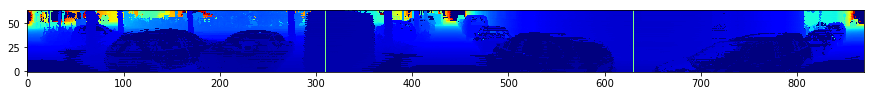

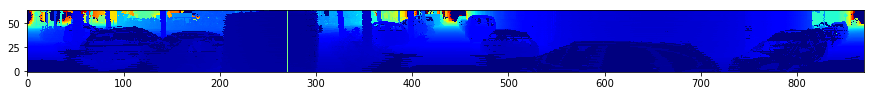

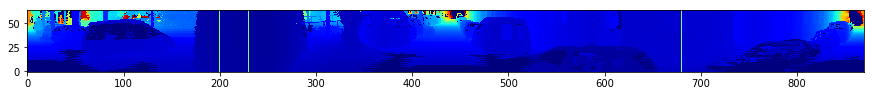

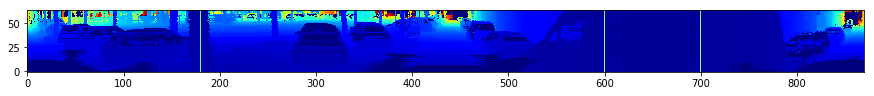

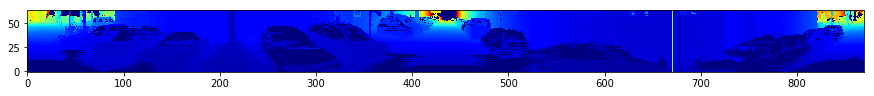

In [147]:
scans = ["scan10159.png", "scan10162.png", "scan10197.png", "scan10321.png", "scan00197.png"] 
rows = [[310, 630], [270], [200, 230, 680], [180, 600, 700], [670]]
colors = ['red', 'blue', 'green', 'magenta', 'orange']

images = []
for scan_name, interesting_rows in zip(scans, rows):
    images.append(read_image(scan_name, interesting_rows))

In [149]:
def draw_depth_at_row(row, image, color, start_idx=0, end_idx=64):
    y_list = list(range(0,len(angles)))
    lineplot = plt.plot(y_list[start_idx:end_idx], image[start_idx:end_idx, row], color)
    return image[:, row]

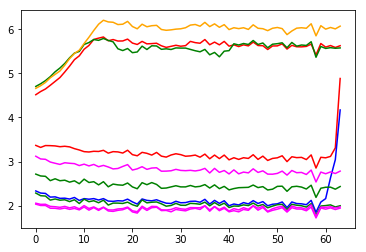

In [143]:
depth_rows = []
for image, rows_test, color in zip(images, rows, colors):
    for row in rows_test:
        depth_rows.append((color, draw_depth_at_row(row, image, color)))

We need to apply this to data:
 [0.030000000000000249, 0.0, 0.061999999999999833, 0.0020000000000000018, 0.016000000000000014, -0.02200000000000002, 0.030000000000000027, -0.02200000000000002, 0.03400000000000003, -0.066000000000000059, 0.072000000000000064, -0.058000000000000052, 0.064000000000000057, -0.066000000000000059, 0.078000000000000069, 0.0099999999999997868, -0.023999999999999799, -0.014000000000000012, -0.042000000000000037, 0.09199999999999986, 0.026000000000000023, -0.12799999999999989, 0.06800000000000006, -0.062000000000000055, -0.010000000000000009, 0.076000000000000068, -0.0040000000000000036, 0.031999999999999806, -0.053999999999999826, 0.018000000000000016, 0.014000000000000012, -0.042000000000000037, -0.016000000000000014, 0.026000000000000023, -0.080000000000000071, 0.11999999999999988, -0.10399999999999987, 0.092000000000000082, -0.054000000000000048, 0.079999999999999849, -0.025999999999999801, 0.025999999999999801, -0.053999999999999826, 0.020000000000000018, -

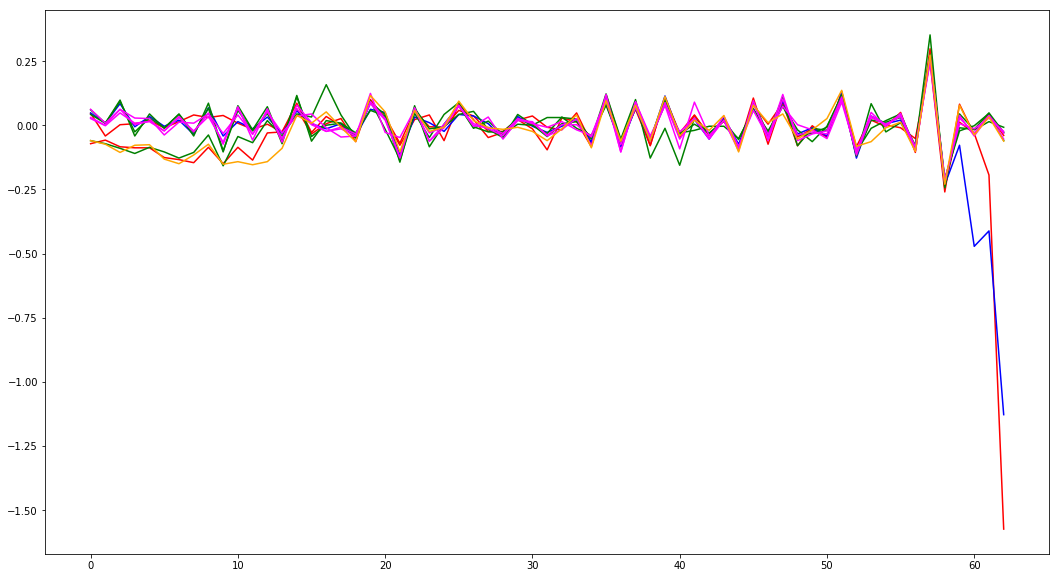

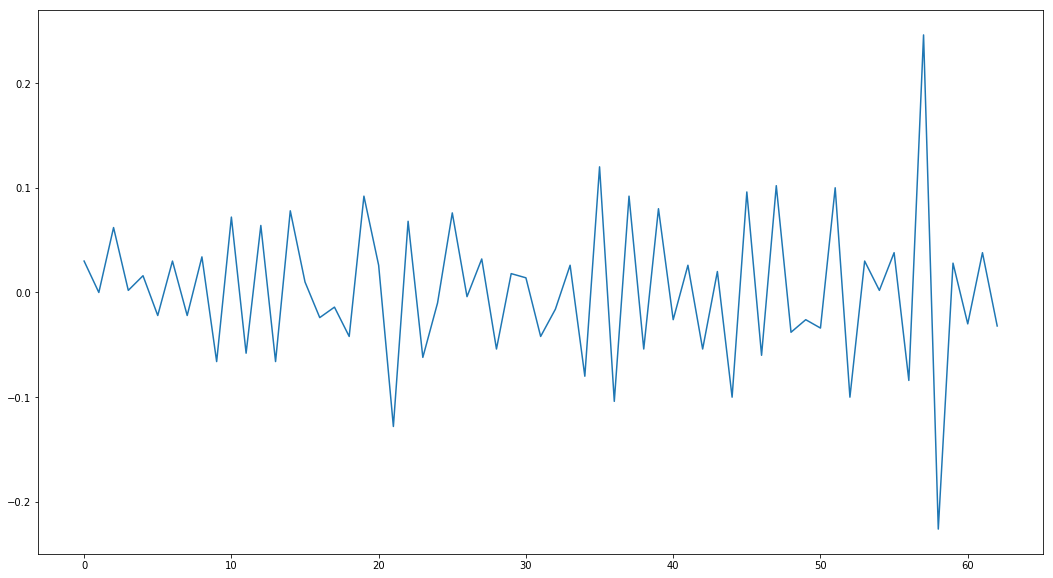

In [177]:
def plot_diff_to_prev(input_list, color):
    diff_array = [x - x_prev for x, x_prev in zip(input_list[:-1], input_list[1:])]
    plt.plot(diff_array, color) 
    return diff_array

start_idx = 0
end_idx = 64
plt.figure(figsize=medium_plot)
change_array = None
for color, depth_row in depth_rows:
    diff_array = plot_diff_to_prev(depth_row[start_idx:end_idx], color)
    if color == 'magenta':
        change_array = diff_array

plt.figure(figsize=medium_plot)
plt.plot(change_array)
print("We need to apply this to data:\n", change_array)
